In [1]:
import re
import matplotlib.pyplot as plt
import os

In [2]:
def get_file_paths(directory):
    file_paths = []  # Initialize an empty list to store file paths

    # Iterate through files in the specified directory
    for file_name in os.listdir(directory):
        # Construct full path
        full_path = os.path.join(directory, file_name)
        # Ensure it's a file (not a directory) before appending
        if os.path.isfile(full_path):
            file_paths.append(full_path)

    return file_paths
    

# List of file paths for all four files
#file_paths = [
#    '../Experiments/Experiment_1/Experiment_11-12-2024-16-29-34',
#    '../Experiments/Experiment_1/Experiment_11-12-2024-17-13-24',
#    '../Experiments/Experiment_1/Experiment_11-12-2024-17-52-38',
#    '../Experiments/Experiment_1/Experiment_11-12-2024-18-29-01'
#]

directory = '../Experiments/Experiments/'
file_paths = get_file_paths(directory)
print(file_paths)

# Initialize lists to store accuracies from each file
accuracies_1, accuracies_2, accuracies_3, accuracies_4 = [], [], [], []

# List to hold accuracy lists
accuracy_lists = [accuracies_1, accuracies_2, accuracies_3, accuracies_4]

# Loop through each file and extract accuracies
for i, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find the section after "SUMMARY EXPERIMENTS-"
    summary_section = content.split("SUMMARY EXPERIMENTS-")[-1]
    
    # Extract accuracy values using regex
    accuracies = re.findall(r'Accuracy:\s*([0-9]*\.?[0-9]+)', summary_section)
    
    # Convert accuracy strings to floats and store them in the corresponding list
    accuracy_lists[i].extend([float(acc) for acc in accuracies])

# Print all accuracy lists
print("Accuracies 1:", accuracies_1)
print("Accuracies 2:", accuracies_2)
print("Accuracies 3:", accuracies_3)
print("Accuracies 4:", accuracies_4)


['../Experiments/Experiments/Experiment_12-12-2024-16-27-00', '../Experiments/Experiments/Experiment_13-12-2024-17-07-02 - Random Clustering']
Accuracies 1: [0.3693, 0.5359, 0.704, 0.8055, 0.8308, 0.8316, 0.8414, 0.8706, 0.9045, 0.9178, 0.8942, 0.9224, 0.918, 0.9338, 0.9359, 0.9364, 0.9362, 0.9443, 0.948, 0.9505, 0.9421, 0.9522, 0.9558, 0.9542, 0.9522]
Accuracies 2: [0.4275, 0.5444, 0.7534, 0.7836, 0.8036, 0.8637, 0.8807, 0.9011, 0.9011, 0.9148, 0.9177, 0.9235, 0.9168, 0.9255, 0.9228, 0.9361, 0.9422, 0.9295, 0.9472, 0.9467, 0.9531, 0.9523, 0.9558, 0.9581, 0.9563]
Accuracies 3: []
Accuracies 4: []


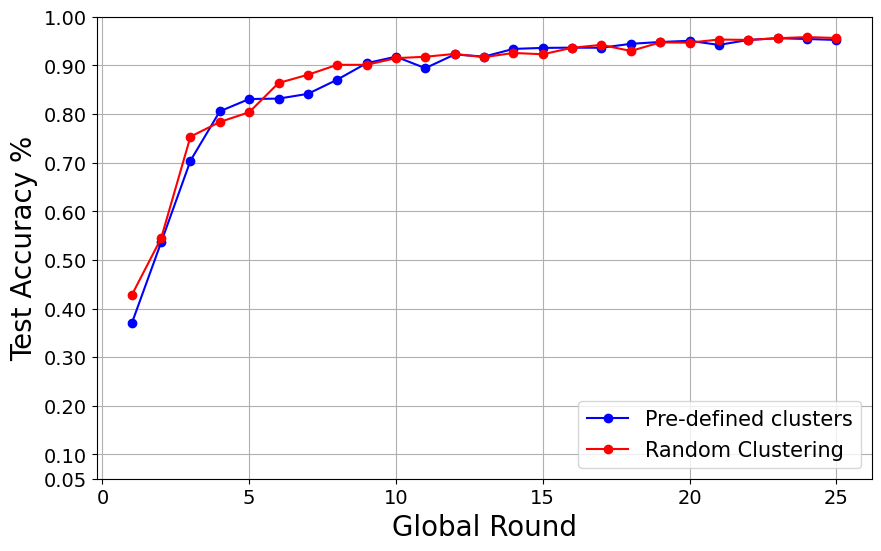

In [6]:
global_rounds = list(range(1, 26))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(global_rounds, accuracies_1, marker='o', linestyle='-', color='b', label='Pre-defined clusters')
plt.plot(global_rounds, accuracies_2, marker='o', linestyle='-', color='red', label='Random Clustering')
#plt.plot(global_rounds, accuracies_3, marker='o', linestyle='-', color='orange', label='k1 = 25, k2 = 2')
#plt.plot(global_rounds, accuracies_4, marker='o', linestyle='-', color='green', label='k1 = 50, k2 = 1')

plt.legend(loc="lower right", fontsize=15)

# Add labels
plt.xlabel('Global Round', fontsize=20)
plt.ylabel('Test Accuracy %', fontsize=20)

# Set the y-axis limit
plt.ylim(0.05, 1)

# Define the ticks you want on the y-axis
ticks = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Set the y-axis ticks
plt.yticks(ticks, fontsize=14)
plt.xticks(fontsize=14)

# Show the plot
plt.grid(True)
plt.show()